# Importing libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

**Importing the traing data**

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Explaining Dataset**

survival : Survival 0 = No, 1 = Yes <br>
pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex : Sex <br>
Age : Age in years <br>
sibsp : Number of siblings / spouses aboard the Titanic 
<br>parch : of parents / children aboard the Titanic <br>
ticket : Ticket number fare Passenger fare cabin Cabin number <br>
embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Visualization from data**

<AxesSubplot:xlabel='Survived', ylabel='count'>

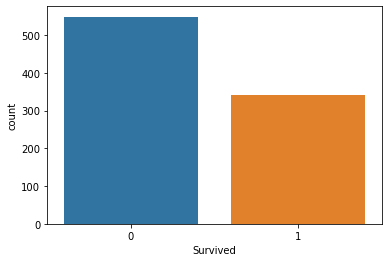

In [7]:
# Countplot of number of passengers who survived/died

sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

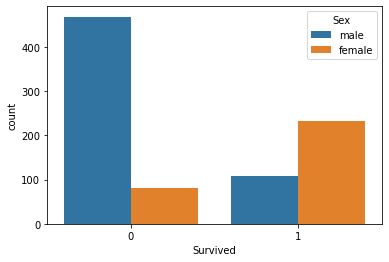

In [8]:
# Male & Female passengers survived

sns.countplot(x='Survived',data=df,hue='Sex')

In [9]:
# Checking for missing data if_any 

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

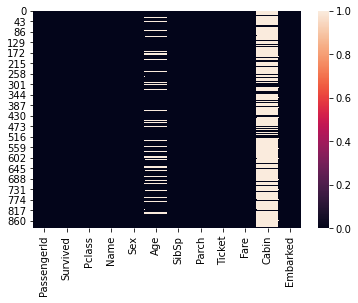

In [10]:
# visualizing the null values using heatmap

sns.heatmap(df.isna())

**Data Cleaning**

In [11]:
# Handling the missing values values

df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].value_counts().index[0],inplace=True)
# Replacing Age missing values by its median

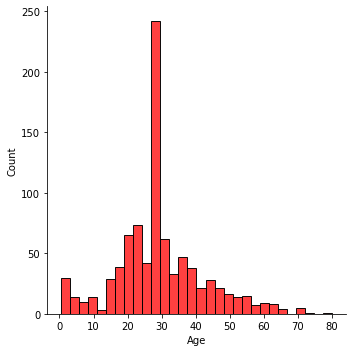

In [12]:
sns.displot(df['Age'],color='r')

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
# Dropping unwanted features from the tarin_dataset

df.drop(['Name','Ticket','Cabin'], axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
# Converting the categorical values to numbers using get_dummies 
# Drop_first will drop one column to avoid dummy variable trap

df=pd.get_dummies(df,drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [16]:
# Defing the Matrix_features x and Target variable y

x=df[['Pclass','Age','SibSp','Parch','Fare','Sex_male']]
y=df['Survived']


In [17]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [18]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**As we have preprocessed the data we now apply the ML algorithm**







# Random Forest Classifier

In [19]:
# Spliting the data into training set and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =1)

In [20]:
# Appling the algorithm and testing the accuaracy on the traing set 

from sklearn import ensemble

classifier= ensemble.RandomForestClassifier(criterion='entropy',max_depth =7, min_samples_split =6, n_estimators = 1000,
                                             random_state = 1, n_jobs = -1)
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       153
           1       0.86      0.63      0.72       115

    accuracy                           0.79       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.81      0.79      0.79       268



**Here we get a accuracy of 0.79**

In [22]:
# Checking the accuracy using cross_val_score

from sklearn.model_selection import cross_val_score
scores =cross_val_score(classifier,x,y, scoring='accuracy', cv=10)
scores

array([0.77777778, 0.82022472, 0.75280899, 0.8988764 , 0.8988764 ,
       0.83146067, 0.82022472, 0.78651685, 0.86516854, 0.84269663])

In [23]:
print('Accuracy using cross_val_score = ', scores.mean())

Accuracy using cross_val_score =  0.8294631710362047


# Applying the classifier model on the test dataset

**Importing the test data**

In [24]:
td=pd.read_csv('test.csv')
td.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [25]:
td['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [26]:
# Handling the missing values 

td['Age'] = td['Age'].fillna(td['Age'].median())
td['Fare'] = td['Fare'].fillna(td['Fare'].median())
td['Embarked']= td['Embarked'].fillna(td['Embarked'].value_counts().index[0])
td.isnull().sum()

# Replacing Age, Fare column missing values by there median, Embarked missing values by the most repeated value 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [27]:
# Droping unwanted features from test_dataset

td=td.drop(['Name','Ticket','Cabin'], axis = 1)
td.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [28]:
# Converting the categorical values to numbers using get_dummies 
# Drop_first will drop one column to avoid dummy variable trap

td= pd.get_dummies(td,drop_first=True)
td.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [29]:
# Defing the Matrix_features x 

td_x=td[['Pclass','Age','SibSp','Parch','Fare','Sex_male']]
td_x.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [30]:
# Predicting the values for test set

prediction =classifier.predict(td_x)

In [31]:
# Saving the prediction in csv file 'submission.csv' file to submit in competition

result = pd.DataFrame({'PassengerId': td.PassengerId,'Survived': prediction})
result.to_csv('submission.csv', index=False)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


**Visualisation of test results**

<AxesSubplot:xlabel='Survived', ylabel='count'>

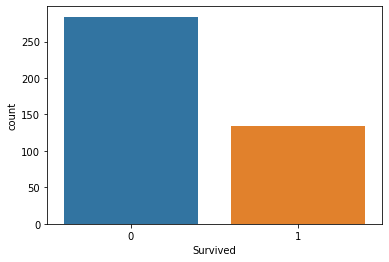

In [32]:
# Survived passengers acc to test_results

sns.countplot(x='Survived',data=result)

<AxesSubplot:xlabel='Survived', ylabel='count'>

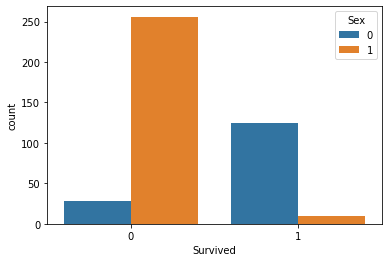

In [33]:
# Number of male and female passengers survived acc to test_set prediction

result = pd.DataFrame({'PassengerId': td.PassengerId,'Sex':td.Sex_male,'Survived': prediction})
sns.countplot(x='Survived',data=result,hue='Sex')